<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Ejercicio_Ingreso_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Actividad 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('sample_data/ingreso.csv')
datos.head()

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203


In [3]:
datos.describe()

,ingreso,horas
count,1000.000000,1000.000000
mean,10077.306402,41.275829
std,2490.167110,0.525277
min,1783.853217,39.930111
25%,8407.200717,40.905475
50%,10072.833245,41.270119
75%,11689.680823,41.638858
max,20032.236920,43.031858


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ingreso  1000 non-null   float64
 1   horas    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


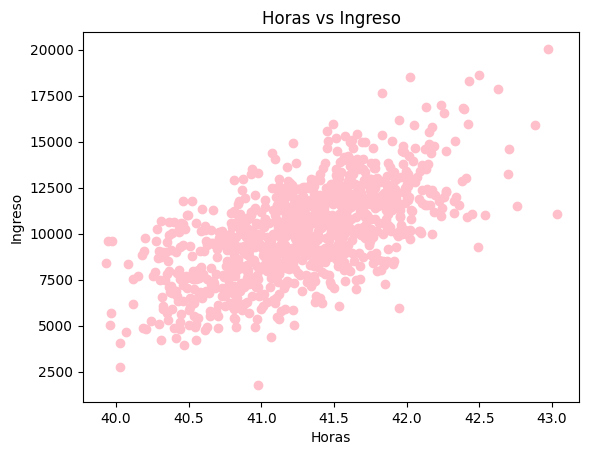

In [5]:
plt.scatter(datos['horas'],datos['ingreso'], color = 'pink')
plt.xlabel('Horas')
plt.ylabel('Ingreso')
plt.title('Horas vs Ingreso')
plt.show()

In [6]:
# modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()


In [7]:
modelo = regresion.fit(datos[['horas']],datos['ingreso'])

In [8]:
modelo = regresion.fit(datos['horas'].values.reshape(-1,1),datos['ingreso'])

In [9]:
datos['horas'].values.reshape(-1,1)

array([[40.90547645],
       [41.57648349],
       [41.36923875],
       [41.53721065],
       [40.44120331],
       [41.14248397],
       [40.6538416 ],
       [41.10474124],
       [41.16330439],
       [41.99282312],
       [40.81829105],
       [41.79740894],
       [41.54968908],
       [41.94595668],
       [42.25682698],
       [41.42071574],
       [41.11936055],
       [41.43981372],
       [40.81609424],
       [42.05745525],
       [41.22442225],
       [42.12842578],
       [41.02596417],
       [41.83003331],
       [41.53446874],
       [41.19208408],
       [41.0608824 ],
       [41.36639293],
       [40.97357054],
       [41.434279  ],
       [40.19363772],
       [40.81339645],
       [40.81883683],
       [41.32268672],
       [39.96872157],
       [42.166788  ],
       [41.46597297],
       [40.96627782],
       [40.61438484],
       [41.28975014],
       [41.6577266 ],
       [41.09909329],
       [42.75641196],
       [41.83140068],
       [41.43067502],
       [41

In [10]:
# vemos lo que es A y B
print("Pendiente(A)", modelo.coef_)
print("Interseccion(B)", modelo.intercept_)

Pendiente(A) [2965.35614382]
Interseccion(B) -112320.22713310868


In [11]:
a = modelo.coef_[0]
b = modelo.intercept_
print(f'y={a}x+{b}')

y=2965.356143820611x+-112320.22713310868


# Representar la recta con los datos

In [12]:
horas = datos['horas'].values.reshape(-1,1)
prediccion=modelo.predict(horas)


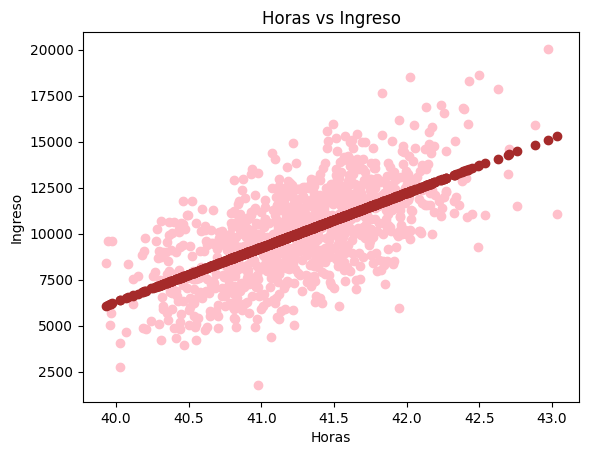

In [13]:
plt.scatter(datos['horas'],datos['ingreso'], color = 'pink')
plt.scatter(datos['horas'],prediccion,color='brown')
plt.xlabel('Horas')
plt.ylabel('Ingreso')
plt.title('Horas vs Ingreso')
plt.show()

In [14]:
# esto es el R cuadrado
modelo.score(datos[['horas']].values,datos['ingreso'])

0.39126726275722723

In [15]:
# ver cual seria el ingreso con 39H con 40H con 43H y con 43.5
entrada = [[39],[40],[43],[43.5]]
modelo.predict(entrada)

array([ 3328.6624759 ,  6294.01861972, 15190.08705118, 16672.76512309])

In [16]:
# filtramos los datos por lo ingresos que estan entre 39.0H
datos[(datos['horas']>=39)& (datos['horas']<40)]

,ingreso,horas
34,5685.523789,39.968722
209,9602.471067,39.973020
485,9578.943984,39.943807
564,8401.547115,39.930111
650,5033.557834,39.957197


In [17]:
datos[(datos['horas']>=40)& (datos['horas']<41)]

,ingreso,horas
0,9973.577534,40.905476
4,9296.396167,40.441203
6,9517.651813,40.653842
10,9108.724524,40.818291
18,10551.848960,40.816094
...,...,...
981,7812.847164,40.349608
982,5924.159567,40.386918
987,6081.212757,40.838115
996,6867.097603,40.617061


# Ejercicio 2

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Genero datos
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)
# Lo convertimos a dataframe
datos=np.concatenate((X, y), axis=1)
df = pd.DataFrame(datos, columns=['X','y'])
df

,X,y
0,1.272530,2.335774
1,0.218526,0.527433
2,1.742669,6.236141
3,1.846213,6.665849
4,0.323072,0.248105
...,...,...
95,1.518683,3.860522
96,1.356911,3.874232
97,0.525897,1.078577
98,1.406752,5.376617


In [19]:
from sklearn.metrics import r2_score
np.random.seed(42)

In [20]:
# Genero datos
X = 2 * np.random.rand(100, 1)        # característica X
y = 3 * X + np.random.randn(100, 1)   # y = 3*X + ruido

In [21]:
# Lo convertimos a DataFrame
datos = np.concatenate((X, y), axis=1)
df = pd.DataFrame(datos, columns=['X1', 'y'])
print("Primeras filas del dataframe:")
print(df.head())

Primeras filas del dataframe:
         X1         y
0  0.749080  2.334288
1  1.901429  5.405278
2  1.463988  4.483724
3  1.197317  1.604382
4  0.312037  0.716440


In [22]:

# Ajustar regresión lineal con scikit-learn
model = LinearRegression()
model.fit(df[['X1']], df['y'])


LinearRegression()

In [23]:
# Coeficientes e intercepto
coef = model.coef_[0]
intercept = model.intercept_
print(f"\nCoeficiente (pendiente): {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")


Coeficiente (pendiente): 2.7701
Intercepto: 0.2151


In [24]:
# Predicciones y R^2
y_pred = model.predict(df[['X1']])
r2 = r2_score(df['y'], y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.7693


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


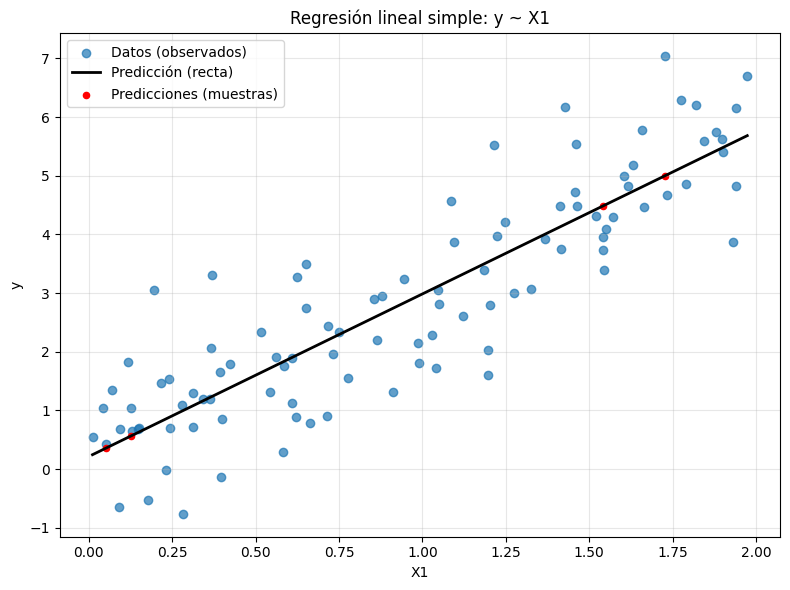

In [25]:
# Ploteo: puntos y línea de regresión
plt.figure(figsize=(8,6))
plt.scatter(df['X1'], df['y'], color='tab:blue', alpha=0.7, label='Datos (observados)')

# Ordeno X para dibujar la línea correctamente
X_plot = np.linspace(df['X1'].min(), df['X1'].max(), 100).reshape(-1,1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='k', linewidth=2, label='Predicción (recta)')

# Marcar algunas predicciones en rojo
idx_sample = np.random.choice(df.index, size=4, replace=False)
plt.scatter(df.loc[idx_sample,'X1'], y_pred[idx_sample], color='red', marker='.', s=80, label='Predicciones (muestras)')

plt.xlabel('X1')
plt.ylabel('y')
plt.title('Regresión lineal simple: y ~ X1')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('regression_plot.png', dpi=150)
plt.show()

# Ejercicio 4 Boston.csv

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [27]:
# Celda 2 cargar y expplorar el conjunto de datos
df_boston = pd.read_csv('sample_data/boston.csv')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
print("=" * 60)
print("INFORMACIÓN DEL DATASET BOSTON")
print("=" * 60)
print(f"\nDimensiones del dataset: {df_boston.shape}")
print(f"Filas: {df_boston.shape[0]}, Columnas: {df_boston.shape[1]}")

print("\n--- Primeras 10 filas ---")
display(df_boston.head(10))

print("\n--- Información general ---")
print(df_boston.info())

INFORMACIÓN DEL DATASET BOSTON

Dimensiones del dataset: (506, 14)
Filas: 506, Columnas: 14

--- Primeras 10 filas ---


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9



--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [29]:
# Celda 3 revisar estadisticas descriptivas y valores nulos
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
display(df_boston.describe())

print("\n--- Verificar valores nulos ---")
print(df_boston.isnull().sum())

print("\n--- Verificar duplicados ---")
print(f"Filas duplicadas: {df_boston.duplicated().sum()}")

ESTADÍSTICAS DESCRIPTIVAS


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



--- Verificar valores nulos ---
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

--- Verificar duplicados ---
Filas duplicadas: 0


In [30]:
#Celda 4 preprocesamiento-normalizar nombres Convertir nombres de columnas a mayúsculas para consistencia
df_boston.columns = df_boston.columns.str.upper()

print("✓ Nombres de columnas normalizados:")
print(df_boston.columns.tolist())

# Mostrar el dataframe actualizado
df_boston.head()

✓ Nombres de columnas normalizados:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


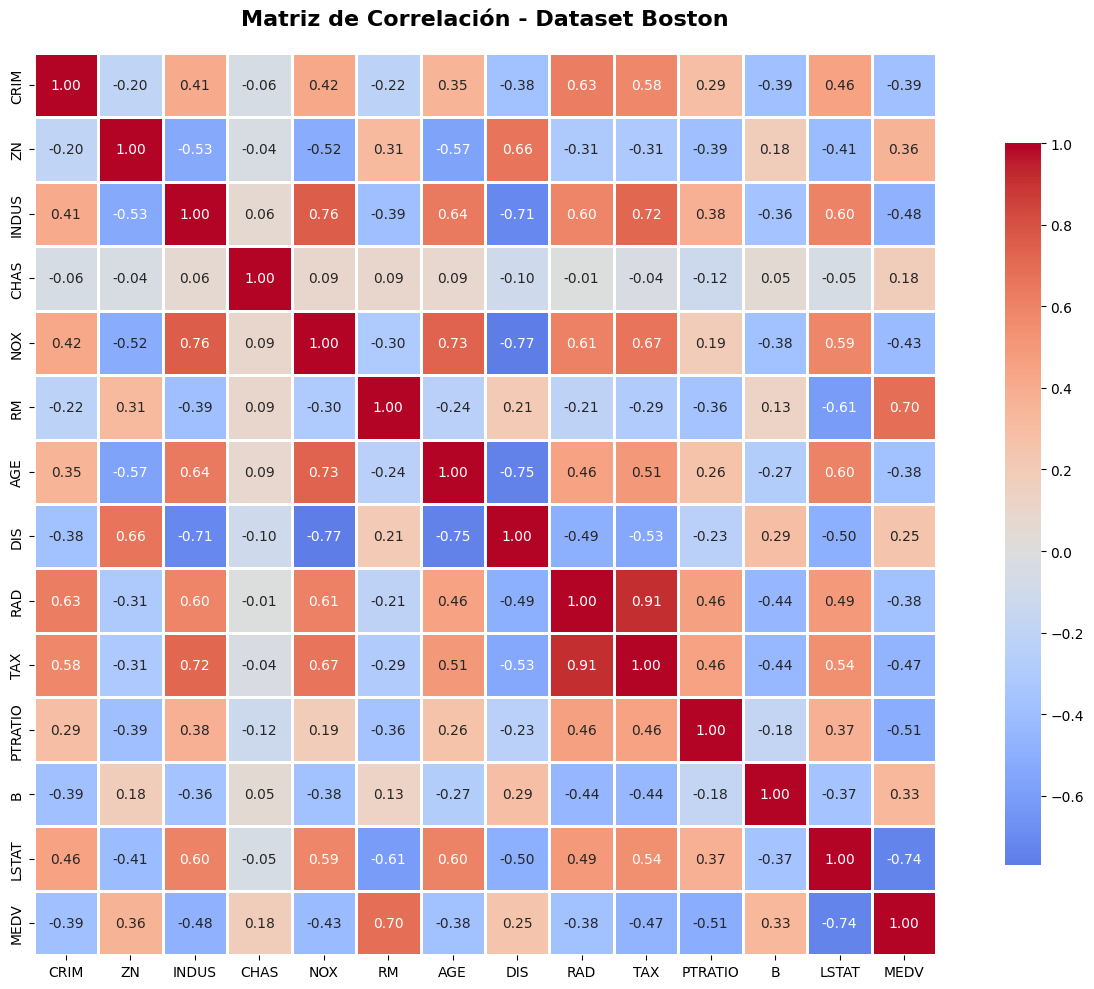


CORRELACIÓN CON MEDV (Variable Objetivo)
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [31]:
#Crear la matriz de correlacion
# Calcular la matriz de correlación
correlacion = df_boston.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Dataset Boston', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Mostrar correlaciones con MEDV ordenadas
print("\n" + "=" * 60)
print("CORRELACIÓN CON MEDV (Variable Objetivo)")
print("=" * 60)
correlacion_medv = correlacion['MEDV'].sort_values(ascending=False)
print(correlacion_medv)

In [32]:
# Celda 6 preparar datos para Regresion lineal multiple
# Seleccionar las características especificadas: RM, AGE, DIS
X = df_boston[['RM', 'AGE', 'DIS']]
y = df_boston['MEDV']

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 60)
print(f"\nVariables independientes (X): {X.columns.tolist()}")
print(f"Variable dependiente (y): MEDV")
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

print("\n--- Primeras 5 filas de X ---")
display(X.head())

PREPARACIÓN DE DATOS PARA REGRESIÓN LINEAL MÚLTIPLE

Variables independientes (X): ['RM', 'AGE', 'DIS']
Variable dependiente (y): MEDV

Forma de X: (506, 3)
Forma de y: (506,)

--- Primeras 5 filas de X ---


,RM,AGE,DIS
0,6.575,65.2,4.0900
1,6.421,78.9,4.9671
2,7.185,61.1,4.9671
3,6.998,45.8,6.0622
4,7.147,54.2,6.0622


In [33]:
# Dividimos los datos en train (80%) y test (20%)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 60)
print("DIVISIÓN DE DATOS: TRAIN/TEST")
print("=" * 60)
print(f"\nDatos de entrenamiento (80%):")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print(f"\nDatos de prueba (20%):")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

print(f"\n✓ Total de muestras: {len(df_boston)}")
print(f"✓ Entrenamiento: {len(X_train)} ({len(X_train)/len(df_boston)*100:.1f}%)")
print(f"✓ Prueba: {len(X_test)} ({len(X_test)/len(df_boston)*100:.1f}%)")

DIVISIÓN DE DATOS: TRAIN/TEST

Datos de entrenamiento (80%):
  X_train: (404, 3)
  y_train: (404,)

Datos de prueba (20%):
  X_test: (102, 3)
  y_test: (102,)

✓ Total de muestras: 506
✓ Entrenamiento: 404 (79.8%)
✓ Prueba: 102 (20.2%)


In [34]:
# Celda 8 Crear y entrenar el modelo de regresion linial multiple
# Crear el modelo
modelo_1 = LinearRegression()

# Entrenar el modelo
modelo_1.fit(X_train, y_train)

print("=" * 60)
print("MODELO DE REGRESIÓN LINEAL MÚLTIPLE ENTRENADO")
print("=" * 60)
print("✓ Modelo entrenado correctamente con RM, AGE, DIS")

MODELO DE REGRESIÓN LINEAL MÚLTIPLE ENTRENADO
✓ Modelo entrenado correctamente con RM, AGE, DIS


In [35]:
# Celda 9 Calcular coeficientes de la ecuacion del plano
# Obtener coeficientes e intercepto
coeficientes = modelo_1.coef_
intercepto = modelo_1.intercept_

print("=" * 60)
print("COEFICIENTES DE LA ECUACIÓN DEL PLANO")
print("=" * 60)
print(f"\nIntercepto (β₀): {intercepto:.4f}")
print("\nCoeficientes de las variables:")
for variable, coef in zip(X.columns, coeficientes):
    print(f"  {variable}: {coef:.4f}")

print("\n--- ECUACIÓN DEL PLANO ---")
print(f"MEDV = {intercepto:.4f} + ({coeficientes[0]:.4f} × RM) + ({coeficientes[1]:.4f} × AGE) + ({coeficientes[2]:.4f} × DIS)")

COEFICIENTES DE LA ECUACIÓN DEL PLANO

Intercepto (β₀): -24.7632

Coeficientes de las variables:
  RM: 8.8561
  AGE: -0.0946
  DIS: -0.4955

--- ECUACIÓN DEL PLANO ---
MEDV = -24.7632 + (8.8561 × RM) + (-0.0946 × AGE) + (-0.4955 × DIS)


In [36]:
#Celda 10 Realizar predicciones y evaluar el modelo0
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = modelo_1.predict(X_train)
y_test_pred = modelo_1.predict(X_test)

# Calcular métricas
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
score_train = modelo_1.score(X_train, y_train)
score_test = modelo_1.score(X_test, y_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("=" * 60)
print("EVALUACIÓN DEL MODELO 1 (RM, AGE, DIS)")
print("=" * 60)

print("\n MÉTRICAS EN ENTRENAMIENTO:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  Score: {score_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")

print("\n MÉTRICAS EN PRUEBA:")
print(f"  R² Score: {r2_test:.4f}")
print(f"  Score: {score_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")

print("\n Interpretación R²:")
print(f"   El modelo explica el {r2_test*100:.2f}% de la variabilidad en MEDV")

EVALUACIÓN DEL MODELO 1 (RM, AGE, DIS)

 MÉTRICAS EN ENTRENAMIENTO:
  R² Score: 0.5484
  Score: 0.5484
  RMSE: 6.2632

 MÉTRICAS EN PRUEBA:
  R² Score: 0.4607
  Score: 0.4607
  RMSE: 6.2887

 Interpretación R²:
   El modelo explica el 46.07% de la variabilidad en MEDV


In [37]:
# Celda 11 Saleccionear mejores caracteristicas segun clasificacion
# Identificar las variables con mayor correlación con MEDV
# Excluir MEDV mismo
correlacion_abs = correlacion['MEDV'].abs().sort_values(ascending=False)
print("=" * 60)
print("SELECCIÓN DE MEJORES CARACTERÍSTICAS")
print("=" * 60)
print("\nCorrelación absoluta con MEDV:")
print(correlacion_abs)

# Seleccionar las 3 variables con mayor correlación (excluyendo MEDV)
top_features = correlacion_abs[1:4].index.tolist()

print(f"\n✓ Top 3 características seleccionadas: {top_features}")
print("\nCorrelaciones:")
for feature in top_features:
    print(f"  {feature}: {correlacion.loc[feature, 'MEDV']:.4f}")

SELECCIÓN DE MEJORES CARACTERÍSTICAS

Correlación absoluta con MEDV:
MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

✓ Top 3 características seleccionadas: ['LSTAT', 'RM', 'PTRATIO']

Correlaciones:
  LSTAT: -0.7377
  RM: 0.6954
  PTRATIO: -0.5078


In [38]:
# Celda 12  Entrenar el modelo con las mejores caracteristicas
# Preparar datos con las mejores características
X2 = df_boston[top_features]
y2 = df_boston['MEDV']

# Dividir datos
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
modelo_2 = LinearRegression()
modelo_2.fit(X2_train, y2_train)

print("=" * 60)
print("MODELO 2 CON MEJORES CARACTERÍSTICAS")
print("=" * 60)
print(f"✓ Modelo entrenado con: {top_features}")

# Coeficientes
print(f"\nIntercepto: {modelo_2.intercept_:.4f}")
print("\nCoeficientes:")
for variable, coef in zip(top_features, modelo_2.coef_):
    print(f"  {variable}: {coef:.4f}")

MODELO 2 CON MEJORES CARACTERÍSTICAS
✓ Modelo entrenado con: ['LSTAT', 'RM', 'PTRATIO']

Intercepto: 14.5881

Coeficientes:
  LSTAT: -0.5671
  RM: 4.9331
  PTRATIO: -0.8671


In [39]:
#Celda 13 evaluar el modelo mejorado
# Predicciones
y2_train_pred = modelo_2.predict(X2_train)
y2_test_pred = modelo_2.predict(X2_test)

# Métricas
r2_train_2 = r2_score(y2_train, y2_train_pred)
r2_test_2 = r2_score(y2_test, y2_test_pred)
rmse_train_2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
rmse_test_2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

print("=" * 60)
print("EVALUACIÓN DEL MODELO 2 (MEJORES CARACTERÍSTICAS)")
print("=" * 60)

print("\n MÉTRICAS EN PRUEBA:")
print(f"  R² Score: {r2_test_2:.4f}")
print(f"  RMSE: {rmse_test_2:.4f}")

print("\n" + "=" * 60)
print("COMPARACIÓN DE MODELOS")
print("=" * 60)
print(f"\nModelo 1 (RM, AGE, DIS):")
print(f"  R² Test: {r2_test:.4f}")
print(f"  RMSE Test: {rmse_test:.4f}")

print(f"\nModelo 2 ({', '.join(top_features)}):")
print(f"  R² Test: {r2_test_2:.4f}")
print(f"  RMSE Test: {rmse_test_2:.4f}")

mejora_r2 = ((r2_test_2 - r2_test) / r2_test) * 100
mejora_rmse = ((rmse_test - rmse_test_2) / rmse_test) * 100

print(f"\n MEJORA:")
print(f"  R² mejoró: {mejora_r2:+.2f}%")
print(f"  RMSE mejoró: {mejora_rmse:+.2f}%")

if r2_test_2 > r2_test:
    print("\n ¡El Modelo 2 es MEJOR!")
else:
    print("\n El Modelo 1 era mejor")

EVALUACIÓN DEL MODELO 2 (MEJORES CARACTERÍSTICAS)

 MÉTRICAS EN PRUEBA:
  R² Score: 0.6303
  RMSE: 5.2072

COMPARACIÓN DE MODELOS

Modelo 1 (RM, AGE, DIS):
  R² Test: 0.4607
  RMSE Test: 6.2887

Modelo 2 (LSTAT, RM, PTRATIO):
  R² Test: 0.6303
  RMSE Test: 5.2072

 MEJORA:
  R² mejoró: +36.80%
  RMSE mejoró: +17.20%

 ¡El Modelo 2 es MEJOR!


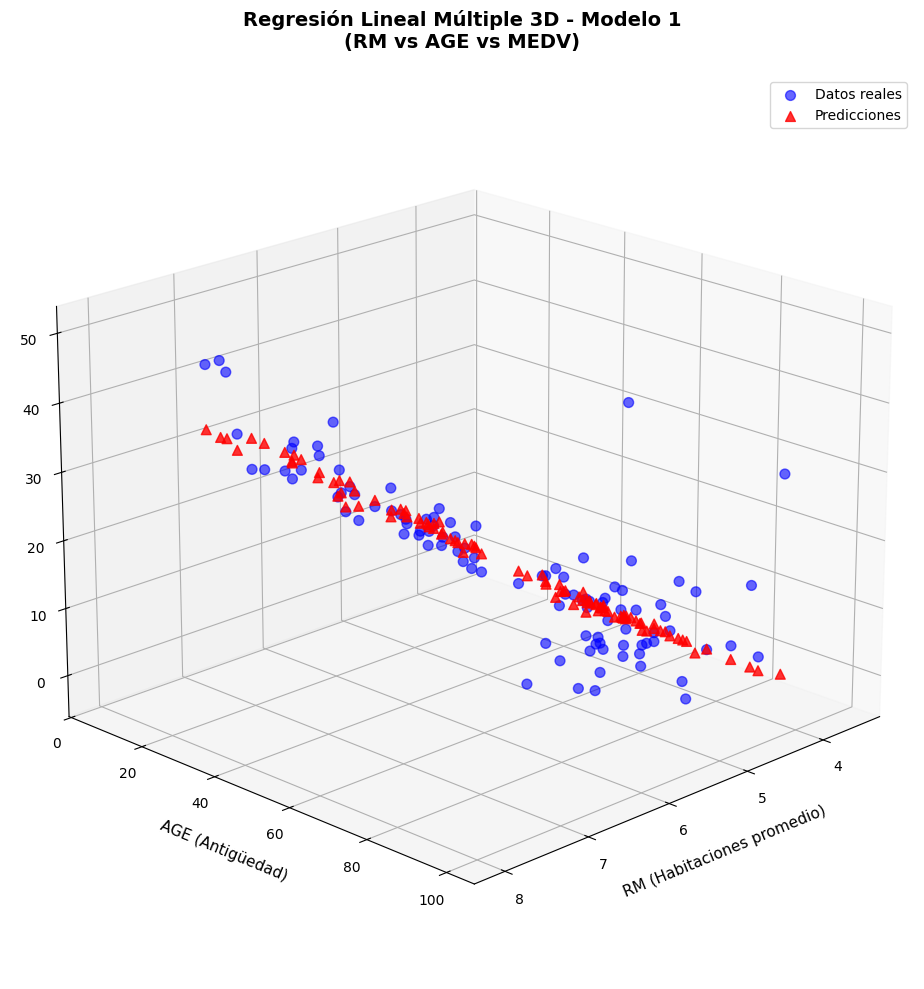

In [ ]:
# Para visualización 3D usaremos RM y LSTAT (las 2 con mayor correlación)
# y MEDV como eje Z

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Datos reales (puntos azules)
ax.scatter(X_test['RM'], X_test['AGE'], y_test,
          c='blue', marker='o', s=50, alpha=0.6, label='Datos reales')

# Predicciones (puntos rojos)
ax.scatter(X_test['RM'], X_test['AGE'], y_test_pred,
          c='red', marker='^', s=50, alpha=0.8, label='Predicciones')

# Etiquetas
ax.set_xlabel('RM (Habitaciones promedio)', fontsize=11, labelpad=10)
ax.set_ylabel('AGE (Antigüedad)', fontsize=11, labelpad=10)
ax.set_zlabel('MEDV (Precio $1000s)', fontsize=11, labelpad=10)
ax.set_title('Regresión Lineal Múltiple 3D - Modelo 1\n(RM vs AGE vs MEDV)',
            fontsize=14, fontweight='bold', pad=20)

ax.legend()
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

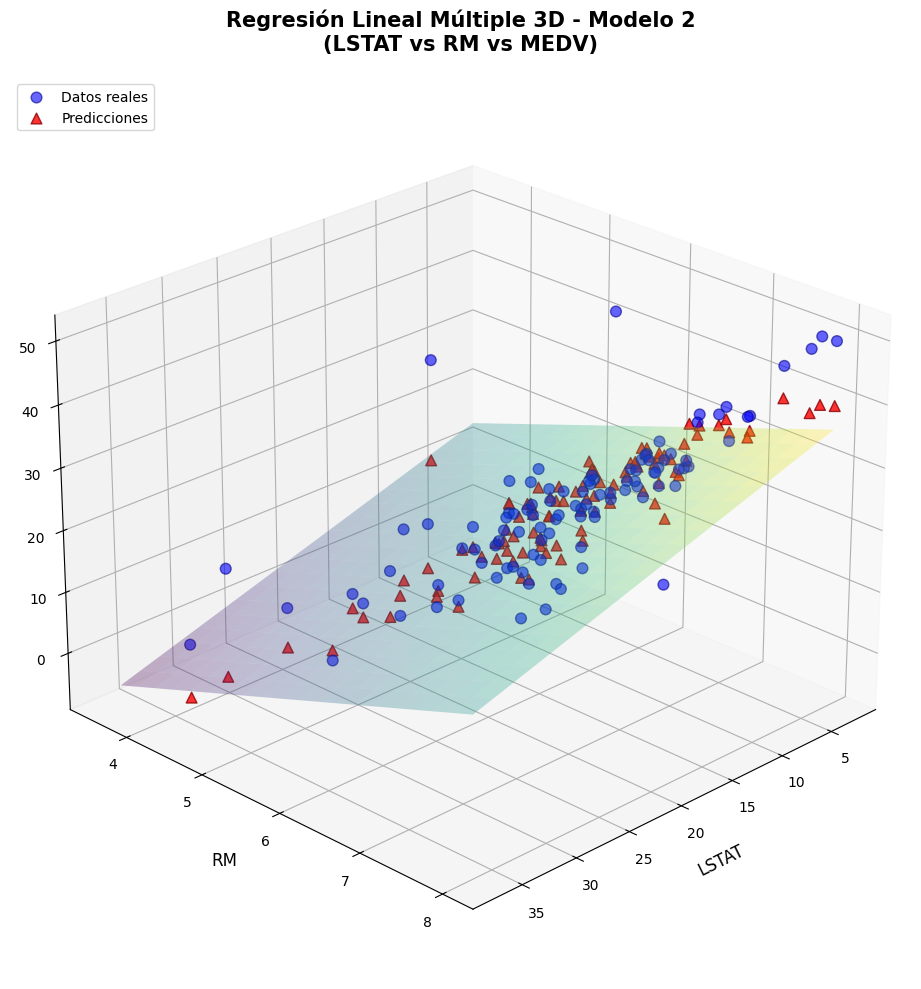


✓ Gráfico 3D generado con LSTAT y RM
   (La tercera variable PTRATIO se mantiene en su valor medio)


In [ ]:
# Crear el gráfico 3D para el Modelo 2
# Usaremos las 2 primeras variables de top_features

var1, var2 = top_features[0], top_features[1]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(X2_test[var1], X2_test[var2], y2_test,
          c='blue', marker='o', s=60, alpha=0.6, label='Datos reales', edgecolors='darkblue')

# Crear malla para el plano de regresión
x1_range = np.linspace(X2_test[var1].min(), X2_test[var1].max(), 20)
x2_range = np.linspace(X2_test[var2].min(), X2_test[var2].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Para predicción necesitamos todas las variables del modelo
# Usaremos los valores medios para la tercera variable
X_mesh = pd.DataFrame({
    var1: x1_mesh.ravel(),
    var2: x2_mesh.ravel(),
    top_features[2]: [X2_test[top_features[2]].mean()] * len(x1_mesh.ravel())
})

z_mesh = modelo_2.predict(X_mesh).reshape(x1_mesh.shape)

# Dibujar el plano de regresión
ax.plot_surface(x1_mesh, x2_mesh, z_mesh, alpha=0.3, cmap='viridis')

# Asegurarse de que y2_test_pred está definida. Si no lo está, ejecutar la celda anterior.
# Se asume que la celda que calcula y2_test_pred ya ha sido ejecutada.
# Si no lo ha sido, se generará un NameError.
# Predicciones como puntos
ax.scatter(X2_test[var1], X2_test[var2], y2_test_pred,
          c='red', marker='^', s=60, alpha=0.8, label='Predicciones', edgecolors='darkred')

# Configuración
ax.set_xlabel(f'{var1}', fontsize=12, labelpad=10)
ax.set_ylabel(f'{var2}', fontsize=12, labelpad=10)
ax.set_zlabel('MEDV (Precio $1000s)', fontsize=12, labelpad=10)
ax.set_title(f'Regresión Lineal Múltiple 3D - Modelo 2\n({var1} vs {var2} vs MEDV)',
            fontsize=15, fontweight='bold', pad=20)

ax.legend(loc='upper left')
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print(f"\n✓ Gráfico 3D generado con {var1} y {var2}")
print(f"   (La tercera variable {top_features[2]} se mantiene en su valor medio)")

In [ ]:
# Celda para realizar predicciones y evaluar el Modelo 2
# Predicciones en conjunto de entrenamiento y prueba para Modelo 2
y2_train_pred = modelo_2.predict(X2_train)
y2_test_pred = modelo_2.predict(X2_test)

# Calcular métricas para Modelo 2
r2_train_2 = r2_score(y2_train, y2_train_pred)
r2_test_2 = r2_score(y2_test, y2_test_pred)
score_train_2 = modelo_2.score(X2_train, y2_train)
score_test_2 = modelo_2.score(X2_test, y2_test)

rmse_train_2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
rmse_test_2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

print("=" * 60)
print("EVALUACIÓN DEL MODELO 2 (LSTAT, RM, PTRATIO)")
print("=" * 60)

print("\n MÉTRICAS EN ENTRENAMIENTO:")
print(f"  R² Score: {r2_train_2:.4f}")
print(f"  Score: {score_train_2:.4f}")
print(f"  RMSE: {rmse_train_2:.4f}")

print("\n MÉTRICAS EN PRUEBA:")
print(f"  R² Score: {r2_test_2:.4f}")
print(f"  Score: {score_test_2:.4f}")
print(f"  RMSE: {rmse_test_2:.4f}")

print("\n Interpretación R²:")
print(f"   El Modelo 2 explica el {r2_test_2*100:.2f}% de la variabilidad en MEDV en el conjunto de prueba")

EVALUACIÓN DEL MODELO 2 (LSTAT, RM, PTRATIO)

📊 MÉTRICAS EN ENTRENAMIENTO:
  R² Score: 0.6865
  Score: 0.6865
  RMSE: 5.2191

📊 MÉTRICAS EN PRUEBA:
  R² Score: 0.6303
  Score: 0.6303
  RMSE: 5.2072

💡 Interpretación R²:
   El Modelo 2 explica el 63.03% de la variabilidad en MEDV en el conjunto de prueba
